# dslr

DataScience project of school 42

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./datasets/dataset_train.csv")
df.drop(columns=["Index"], inplace=True)
df.dropna(inplace=True)
df['Hogwarts House'].unique()

array(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'], dtype=object)

In [2]:
def house_scores_df(house_name):
    house_filt = (df['Hogwarts House'] == house_name)
    return df[house_filt].loc[:, 'Arithmancy':'Flying']

houses_df = {key: house_scores_df(key) for key in df['Hogwarts House'].unique()}
houses_df['Ravenclaw'].head()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
14,44791.0,-197.527318,2.742444,1.975273,6.603,527.356323,605.590600,5.480097,1063.522361,9.407484,-1.112649,-232.65964,-19.94
15,21630.0,-447.649812,4.046727,4.476498,4.949,810.154483,615.531088,3.653495,1075.853850,9.622899,0.567096,-229.38229,17.00
18,15578.0,-151.088209,6.871857,1.510882,7.906,645.447451,607.442729,6.317446,1091.054831,11.708777,0.260556,-226.76896,11.22


In [3]:
def normalize_house_scores_df(house_scores_df):
    return (house_scores_df - house_scores_df.mean()) / (house_scores_df.max() - house_scores_df.min())

for k, v in houses_df.items():
    houses_df[k] = normalize_house_scores_df(v)
houses_df['Ravenclaw'].head()

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.070306,-0.005636,0.043022,0.005636,-0.015935,-0.117316,-0.163066,0.019460,-0.077827,-0.252914,0.124483,-0.056668,-0.074683
2,-0.197869,0.068820,0.166863,-0.068820,0.075970,0.103740,0.013395,-0.092922,0.281957,0.135497,-0.091151,0.126031,0.106128
14,-0.034800,0.171845,-0.141995,-0.171845,0.105978,0.026350,0.020960,0.036164,0.098966,0.188900,-0.195761,-0.052163,-0.052756
15,-0.213890,0.018958,-0.061146,-0.018958,-0.001222,0.185477,0.045982,-0.086354,0.190823,0.205844,0.098415,0.057674,0.063788
18,-0.260687,0.200230,0.113977,-0.200230,0.190430,0.092798,0.025622,0.092329,0.304054,0.369908,0.044731,0.145258,0.045552


In [4]:
scores_df = normalize_house_scores_df(df.loc[:, 'Arithmancy':'Flying'])

bins = np.arange(scores_df.min().min(), scores_df.max().max(), 0.1)
bins

array([-0.65609001, -0.55609001, -0.45609001, -0.35609001, -0.25609001,
       -0.15609001, -0.05609001,  0.04390999,  0.14390999,  0.24390999,
        0.34390999,  0.44390999,  0.54390999])

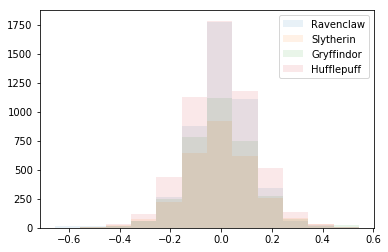

In [5]:
houses_scores_series = {k: pd.Series() for k in houses_df.keys()}
for k, v in houses_df.items():
    for col in houses_df[k]:
        houses_scores_series[k] = houses_scores_series[k].append(houses_df[k][col])
        
#print(houses_scores_series)

for k, v in houses_scores_series.items():
    plt.hist(v, bins, histtype='bar', rwidth=1, alpha=0.1, label=k)
plt.legend()
plt.show()

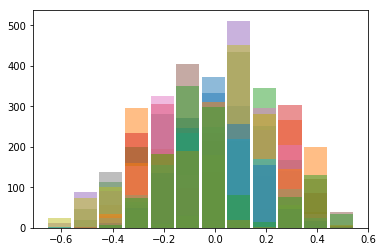

In [12]:
for col in scores_df:
    plt.hist(scores_df[col], bins, rwidth=0.9, alpha=0.5, label=col)
#plt.legend()
plt.show()

In [16]:
df.corr()[df.corr() < 1.0].max()

Arithmancy                       0.082528
Astronomy                        0.512377
Herbology                        0.747755
Defense Against the Dark Arts    0.591140
Divination                       0.549033
Muggle Studies                   0.853373
Ancient Runes                    0.566074
History of Magic                 0.846511
Transfiguration                  0.846511
Potions                          0.598582
Care of Magical Creatures        0.063826
Charms                           0.853373
Flying                           0.566074
dtype: float64

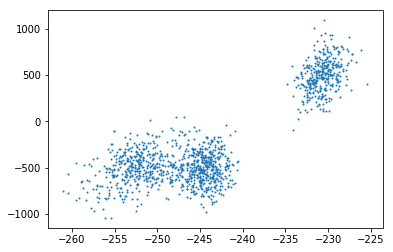

In [23]:
plt.scatter( df['Charms'],df['Muggle Studies'], s=1)

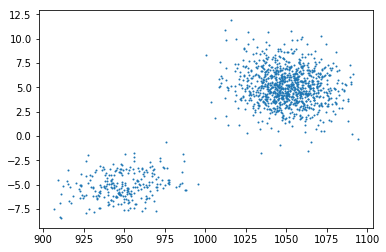

In [22]:
plt.scatter(df['Transfiguration'], df['History of Magic'], s=1)